# <p style="text-align:center;"><span style="font-size:48px;"><span style="color:#007BFF;"><span style="font-family:cursive;"> Corona Virus EDA</span> </span>  </span></p>

<a id="contents_tabel"></a>
<div style="border-radius:10px; padding: 15px; background-color: #DC3545; font-size:115%; text-align:left">

<h3 align="left"><font color=white>Table of Contents :</font></h3>

* [Phase 1 : Import & Install Libraries](#import)    
* [Phase 2 : About Dataset](#about)
    - [Phase 2.1 : Import Dataset](#importdata)
    - [Phase 2.2 : About Features](#features)
* [Phase 3 : Initial EDA ( Exploratory data analysis ) On Dataset](#eda)
    - [Phase 3.1 : Descriptive EDA](#des)
    - [Phase 3.2 : Visualization EDA](#vis)
    - [Phase 3.3 : Intelligently EDA](#ieda)
        - [Phase 3.3.1 : Pandas Profiling](#i1)
        - [Phase 3.3.2 : PandasAI](#i2)   


<a id="import"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 1 : Import & Install Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [4]:
!pip install pandasai
!pip install --upgrade typing
!pip install -U pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 1.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=7c2c34d1fc21c0aa98782d661d3d99105e0a6691ed4f7ca7a5d58c4391556784
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing
  Using cached pydantic-2.8.2-py3-none-any.whl.metadata (125 kB)
Using cached pydantic-2.8.2-py3-none-any.whl (423 kB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.17
    Uninstalling pydantic-1.10.17:
      Successfully uninstalled pydantic-1.10.17


In [60]:
!pip install openai

In [14]:
!pip list > libraries.txt
!echo $(grep -r "pandasai" .)
!echo $(grep -r "pandas-profiling" .)

./libraries.txt:pandasai 2.2.12
./libraries.txt:pandas-profiling 3.6.6
./libraries.txt:numpy 1.25.2


In [56]:
# Descriptive EDA
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import time
import copy
from sklearn.preprocessing import LabelEncoder

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# IEDA
from ydata_profiling import ProfileReport
from pandasai import SmartDataframe
from pandasai.llm import OpenAI

<a id="import"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 2 : About Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

- **Sno** - Serial number

- **ObservationDate** - Date of the observation in MM/DD/YYYY

- **Province/State** - Province or state of the observation (Could be empty when missing)

- **Country/Region** - Country of observation

- **Last Update** - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)

- **Confirmed** - Cumulative number of confirmed cases till that date

- **Deaths** - Cumulative number of of deaths till that date

- **Recovered** - Cumulative number of recovered cases till that date

<a id="eda"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 3 : Initial EDA ( Exploratory data analysis ) On Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="des"></a>
## <p style="background-color:#23ff16; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 3.1 : Descriptive EDA</p>

⬆️ [Tabel of Contents](#contents_tabel)

<p style="font-family:cursive; color:white; font-size:300%;">Galance Dataset(Weak)</p>

In [6]:
data = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv')

In [7]:
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [8]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [9]:
data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


In [10]:
data.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [11]:
data.tail(2)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


<p style="font-family:cursive; color:white; font-size:300%;">Galance Dataset(Powerful)</p>

In [12]:
cm = sns.light_palette("green", as_cmap=True)
data.head(10).style.background_gradient(cmap=cm)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.000000,0.000000,0.000000
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.000000,0.000000,0.000000
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.000000,0.000000,0.000000
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.000000,0.000000,0.000000
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.000000,0.000000,0.000000
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.000000,0.000000,0.000000
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000


<p style="font-family:cursive; color:white; font-size:300%;">Data info (Weak)</p>

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [26]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 86.8 MB


In [33]:
data.memory_usage()

Index                  128
SNo                2451432
ObservationDate    2451432
Province/State     2451432
Country/Region     2451432
Last Update        2451432
Confirmed          2451432
Deaths             2451432
Recovered          2451432
dtype: int64

In [34]:
data.memory_usage(deep=True)

Index                   128
SNo                 2451432
ObservationDate    20530743
Province/State     17917064
Country/Region     19524608
Last Update        23267631
Confirmed           2451432
Deaths              2451432
Recovered           2451432
dtype: int64

In [37]:
data.memory_usage(deep=True).sum()

91045902

**FM 1 : Search about memory_usage argument.**

<p style="font-family:cursive; color:white; font-size:300%;">Data info (Powerful)</p>

In [36]:
info = pd.DataFrame({"name": data.columns,
                     "non-nulls": len(data) - data.isnull().sum().values,
                     "nulls": data.isnull().sum().values,
                     "type": data.dtypes.values,
                     "memory":data.memory_usage(index=False, deep=True)})

info.style.background_gradient(cmap=cm)

,name,non-nulls,nulls,type,memory
SNo,SNo,306429,0,int64,2451432
ObservationDate,ObservationDate,306429,0,object,20530743
Province/State,Province/State,228329,78100,object,17917064
Country/Region,Country/Region,306429,0,object,19524608
Last Update,Last Update,306429,0,object,23267631
Confirmed,Confirmed,306429,0,float64,2451432
Deaths,Deaths,306429,0,float64,2451432
Recovered,Recovered,306429,0,float64,2451432


<p style="font-family:cursive; color:white; font-size:300%;">Statistical(Waek)</p>

In [38]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


<p style="font-family:cursive; color:white; font-size:300%;">Statistical(Midlevel)</p>

In [40]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SNo,306429.0,NaN,NaN,NaN,153215.0,88458.577156,1.0,76608.0,153215.0,229822.0,306429.0
ObservationDate,306429,494,05/29/2021,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province/State,228329,737,Unknown,4123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,306429,229,Russia,30251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Update,306429,1905,2021-04-02 15:13:53,239885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Confirmed,306429.0,NaN,NaN,NaN,85670.911559,277551.604043,-302844.0,1042.0,10375.0,50752.0,5863138.0
Deaths,306429.0,NaN,NaN,NaN,2036.403268,6410.938048,-178.0,13.0,192.0,1322.0,112385.0
Recovered,306429.0,NaN,NaN,NaN,50420.286304,201512.447838,-854405.0,11.0,1751.0,20270.0,6399531.0


<p style="font-family:cursive; color:white; font-size:300%;">Statistical(Powerful)</p>

In [49]:
data_copy = copy.copy(data)
le = LabelEncoder()
for column in data_copy.loc[:, data_copy.dtypes == object]:
    data_copy[column] = le.fit_transform(data_copy[column])


In [41]:
cm = sns.light_palette("green", as_cmap=True)

info = pd.DataFrame({"name": data.columns,
                     "non-nulls": len(data) - data.isnull().sum().values,
                     "nulls": data.isnull().sum().values,
                     "type": data.dtypes.values,
                     "unique value of feature":data.nunique(),
                     "corr_target": data.corr()["Deaths"],
                     "memory":data.memory_usage(index=False, deep=True)
                    })

describe_stats = data.describe(include='all').T

info["count"] = describe_stats["count"].values
info["mean"] = describe_stats["mean"].values if 'mean' in describe_stats else None
info["std"] = describe_stats["std"].values if 'std' in describe_stats else None
info["min"] = describe_stats["min"].values if 'min' in describe_stats else None
info["25%"] = describe_stats["25%"].values if '25%' in describe_stats else None
info["50%"] = describe_stats["50%"].values if '50%' in describe_stats else None
info["75%"] = describe_stats["75%"].values if '75%' in describe_stats else None
info["max"] = describe_stats["max"].values if 'max' in describe_stats else None
sorted_info = info.sort_values(by='corr_target')
sorted_info.style.background_gradient(cmap=cm)

,name,non-nulls,nulls,type,unique value of feature,corr_target,memory,count,mean,std,min,25%,50%,75%,max
SNo,Recovered,306429,0,float64,306429,0.197038,2451432,306429.000000,50420.286304,201512.447838,-854405.000000,11.000000,1751.000000,20270.000000,6399531.000000
Recovered,Deaths,306429,0,float64,74541,0.538416,2451432,306429.000000,2036.403268,6410.938048,-178.000000,13.000000,192.000000,1322.000000,112385.000000
Confirmed,SNo,306429,0,int64,107146,0.888416,2451432,306429.000000,153215.000000,88458.577156,1.000000,76608.000000,153215.000000,229822.000000,306429.000000
Deaths,Province/State,228329,78100,object,20089,1.000000,2451432,228329,nan,nan,nan,nan,nan,nan,nan
Country/Region,ObservationDate,306429,0,object,229,nan,19524608,306429,nan,nan,nan,nan,nan,nan,nan
Last Update,Country/Region,306429,0,object,1905,nan,23267631,306429,nan,nan,nan,nan,nan,nan,nan
ObservationDate,Last Update,306429,0,object,494,nan,20530743,306429,nan,nan,nan,nan,nan,nan,nan
Province/State,Confirmed,306429,0,float64,737,nan,17917064,306429.000000,85670.911559,277551.604043,-302844.000000,1042.000000,10375.000000,50752.000000,5863138.000000


In [50]:
cm = sns.light_palette("green", as_cmap=True)

info = pd.DataFrame({"name": data_copy.columns,
                     "non-nulls": len(data_copy) - data_copy.isnull().sum().values,
                     "nulls": data_copy.isnull().sum().values,
                     "type": data_copy.dtypes.values,
                     "unique value of feature":data_copy.nunique(),
                     "corr_target": data_copy.corr()["Deaths"],
                     "memory":data_copy.memory_usage(index=False, deep=True)
                    })

describe_stats = data_copy.describe(include='all').T

info["count"] = describe_stats["count"].values
info["mean"] = describe_stats["mean"].values if 'mean' in describe_stats else None
info["std"] = describe_stats["std"].values if 'std' in describe_stats else None
info["min"] = describe_stats["min"].values if 'min' in describe_stats else None
info["25%"] = describe_stats["25%"].values if '25%' in describe_stats else None
info["50%"] = describe_stats["50%"].values if '50%' in describe_stats else None
info["75%"] = describe_stats["75%"].values if '75%' in describe_stats else None
info["max"] = describe_stats["max"].values if 'max' in describe_stats else None
sorted_info = info.sort_values(by='corr_target')
sorted_info.style.background_gradient(cmap=cm)

,name,non-nulls,nulls,type,unique value of feature,corr_target,memory,count,mean,std,min,25%,50%,75%,max
ObservationDate,ObservationDate,306429,0,int64,494,-0.076389,2451432,306429.000000,270.381514,142.302820,0.000000,154.000000,289.000000,392.000000,493.000000
Country/Region,Country/Region,306429,0,int64,229,0.001128,2451432,306429.000000,127.728577,64.218537,0.000000,77.000000,126.000000,178.000000,228.000000
Province/State,Province/State,306429,0,int64,738,0.006390,2451432,306429.000000,462.828632,244.518661,0.000000,254.000000,490.000000,737.000000,737.000000
Last Update,Last Update,306429,0,int64,1905,0.052087,2451432,306429.000000,1822.897712,170.064223,0.000000,1842.000000,1842.000000,1842.000000,1904.000000
SNo,SNo,306429,0,int64,306429,0.197038,2451432,306429.000000,153215.000000,88458.577156,1.000000,76608.000000,153215.000000,229822.000000,306429.000000
Recovered,Recovered,306429,0,float64,74541,0.538416,2451432,306429.000000,50420.286304,201512.447838,-854405.000000,11.000000,1751.000000,20270.000000,6399531.000000
Confirmed,Confirmed,306429,0,float64,107146,0.888416,2451432,306429.000000,85670.911559,277551.604043,-302844.000000,1042.000000,10375.000000,50752.000000,5863138.000000
Deaths,Deaths,306429,0,float64,20089,1.000000,2451432,306429.000000,2036.403268,6410.938048,-178.000000,13.000000,192.000000,1322.000000,112385.000000


<a id="vis"></a>
## <p style="background-color:#23ff16; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 3.2 : Visualization EDA</p>

⬆️ [Tabel of Contents](#contents_tabel)

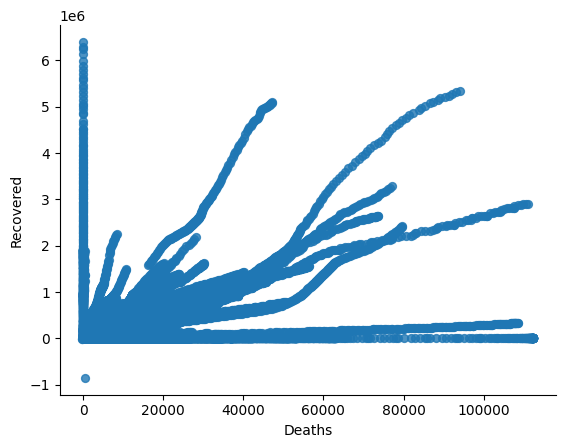

In [42]:
data.plot(kind='scatter', x='Deaths', y='Recovered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

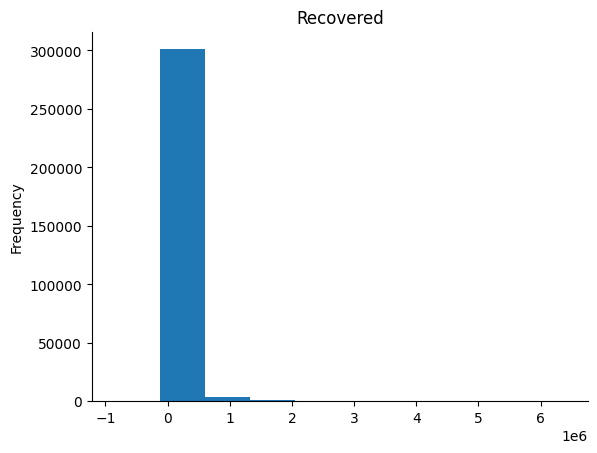

In [46]:
data['Recovered'].plot(kind='hist', bins=10, title='Recovered')
plt.gca().spines[['top', 'right',]].set_visible(False)

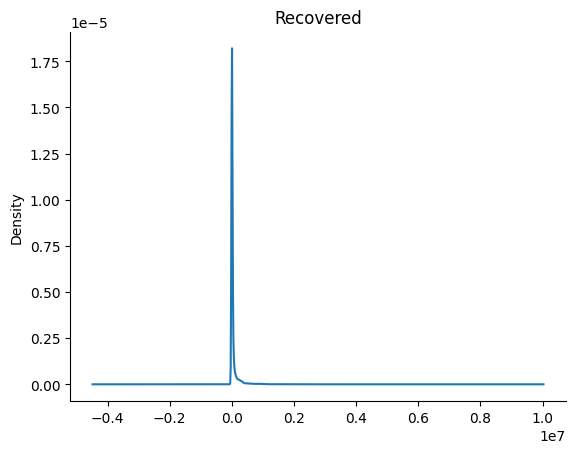

In [48]:
data['Recovered'].plot(kind='kde', title='Recovered')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

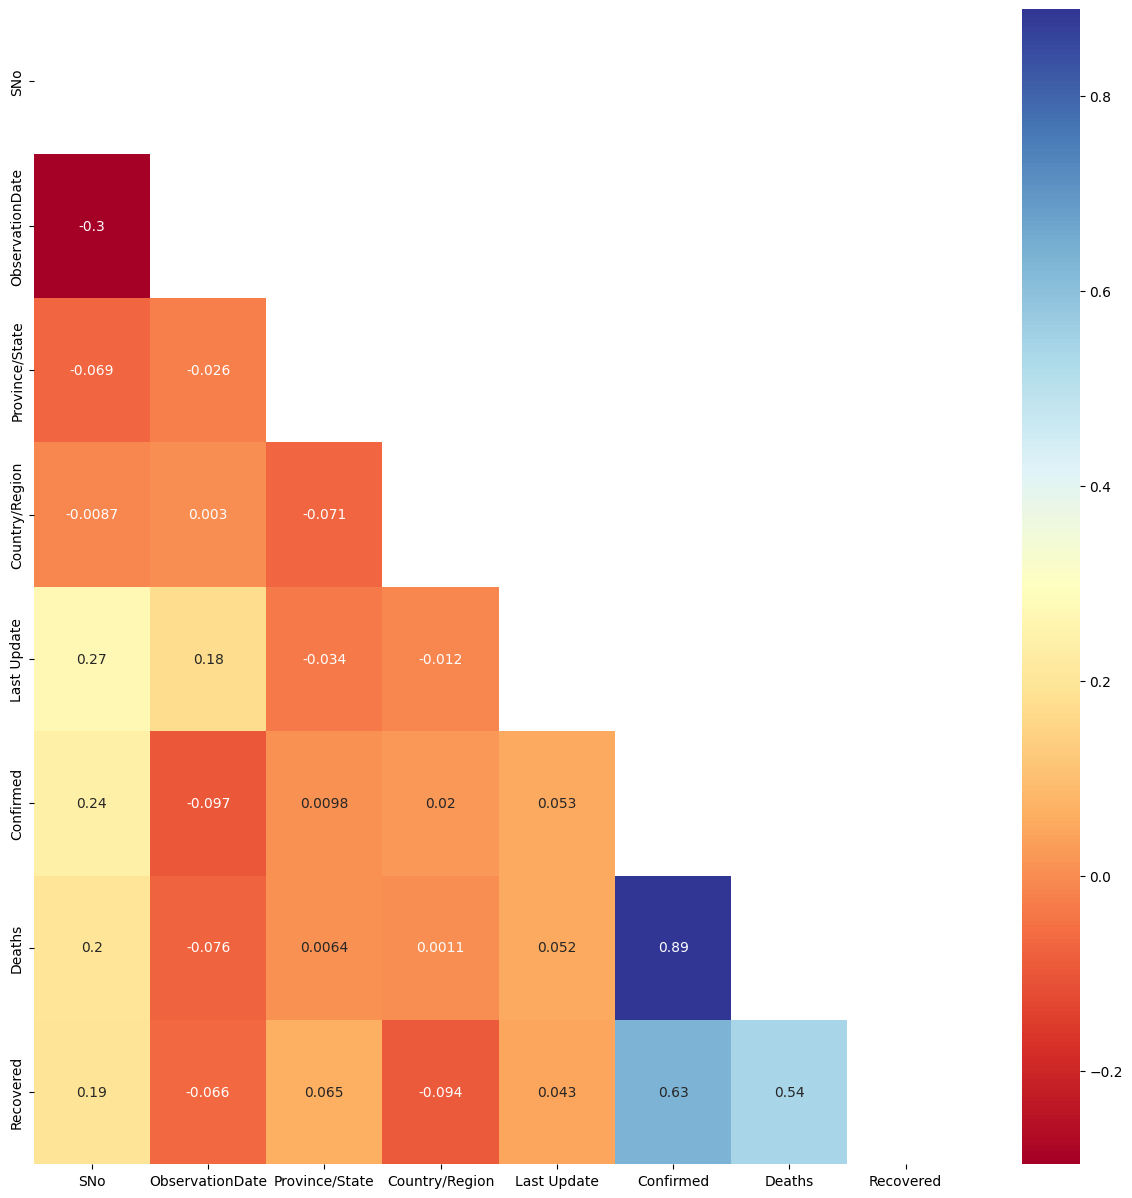

In [51]:
figure = plt.figure(figsize=(15, 15))
sns.heatmap(data_copy.corr(), cmap='RdYlBu', annot=True, mask=np.triu(data_copy.corr()))

In [52]:
def analyze_noise(df):
    """
    Analyzes the noise in each numeric column of the DataFrame and provides visualizations.

    Parameters:
    df (pandas.DataFrame): The DataFrame to be analyzed.

    Returns:
    None
    """

    for column in df.select_dtypes(include=[np.number]).columns:
        print(f"Analyzing column: {column}")

        # Descriptive statistics
        mean_col = df[column].mean()
        median_col = df[column].median()
        std_col = df[column].std()
        skewness_col = df[column].skew()

        print(f"Mean: {mean_col}")
        print(f"Median: {median_col}")
        print(f"Standard Deviation: {std_col}")
        print(f"Skewness: {skewness_col}")

        # Histogram
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f"Histogram of {column}")

        # Box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[column])
        plt.title(f"Box Plot of {column}")

        plt.show()

        # Time series plot if data has a time component
        if pd.api.types.is_datetime64_any_dtype(df.index):
            plt.figure(figsize=(10, 5))
            plt.plot(df.index, df[column])
            plt.title(f"Time Series Plot of {column}")
            plt.xlabel('Time')
            plt.ylabel(column)
            plt.show()

        # Signal-to-Noise Ratio (SNR)
        signal_power = np.mean(df[column] ** 2)
        noise_power = np.var(df[column])
        snr = signal_power / noise_power if noise_power != 0 else np.inf
        print(f"Signal-to-Noise Ratio (SNR): {snr}")

        print("\n" + "-"*40 + "\n")

Analyzing column: SNo
Mean: 153215.0
Median: 153215.0
Standard Deviation: 88458.57715620345
Skewness: 1.1586859416806885e-15


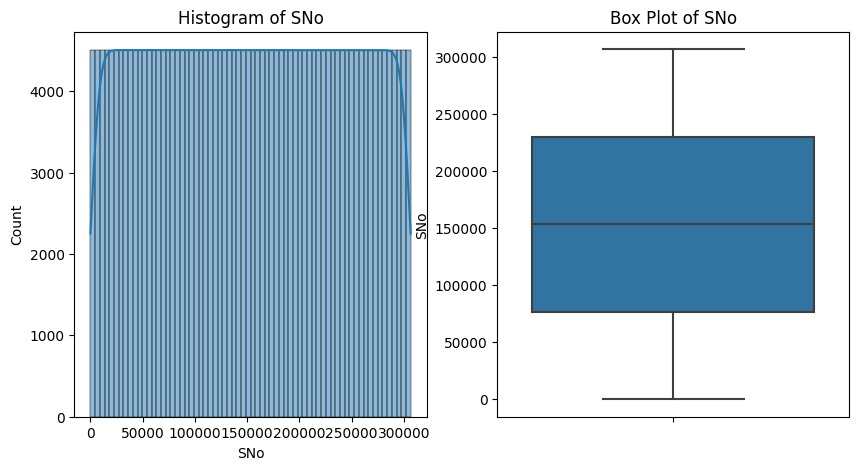

Signal-to-Noise Ratio (SNR): 4.000019580456095

----------------------------------------

Analyzing column: Confirmed
Mean: 85670.91155863185
Median: 10375.0
Standard Deviation: 277551.6040431502
Skewness: 8.768376652095425


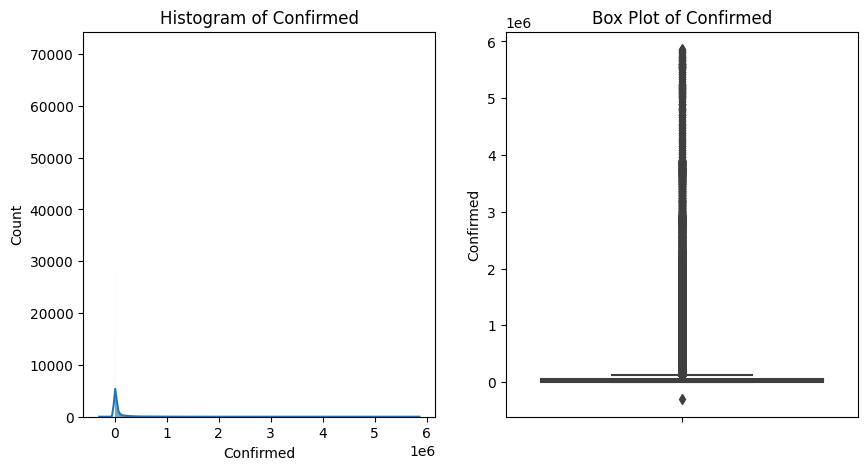

Signal-to-Noise Ratio (SNR): 1.0952753844671936

----------------------------------------

Analyzing column: Deaths
Mean: 2036.4032679674574
Median: 192.0
Standard Deviation: 6410.9380477066725
Skewness: 7.942416501708505


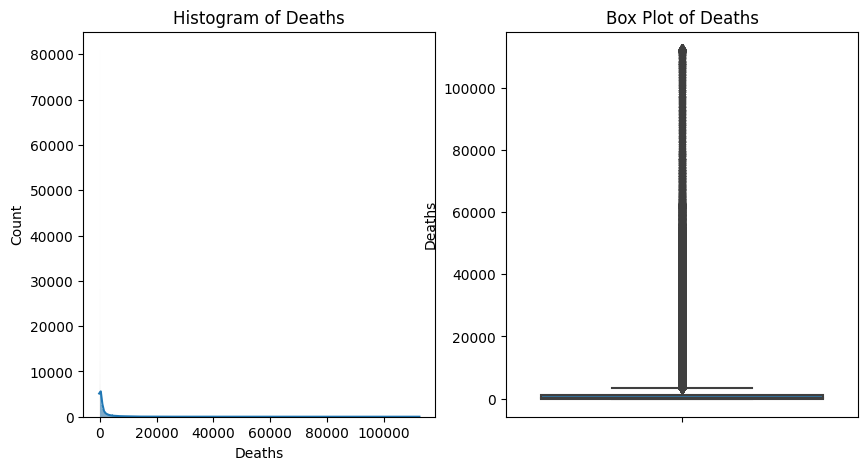

Signal-to-Noise Ratio (SNR): 1.1008987597071302

----------------------------------------

Analyzing column: Recovered
Mean: 50420.28630449468
Median: 1751.0
Standard Deviation: 201512.44783805608
Skewness: 10.694094429331887


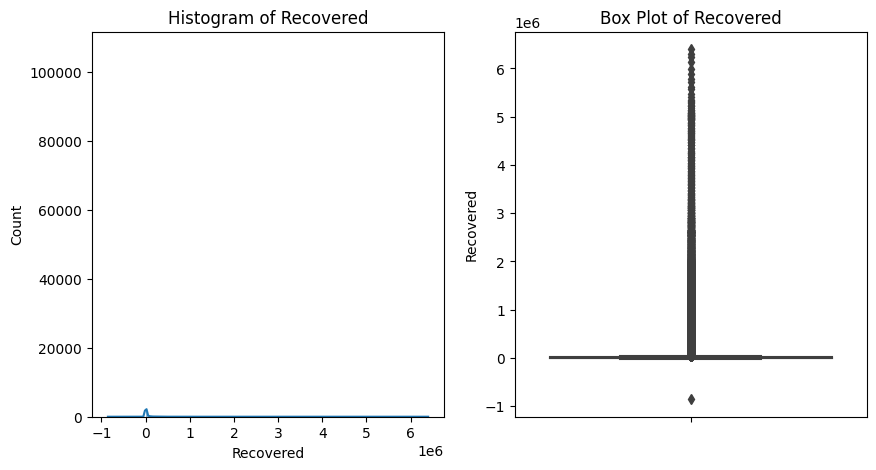

Signal-to-Noise Ratio (SNR): 1.0626048926222182

----------------------------------------



In [53]:
analyze_noise(data)

Analyzing column: SNo
Mean: 153215.0
Median: 153215.0
Standard Deviation: 88458.57715620345
Skewness: 1.1586859416806885e-15


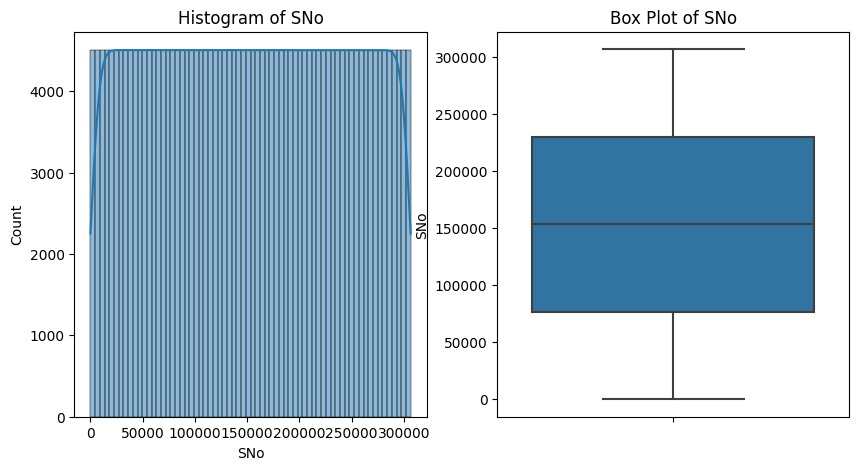

Signal-to-Noise Ratio (SNR): 4.000019580456095

----------------------------------------

Analyzing column: ObservationDate
Mean: 270.3815141517285
Median: 289.0
Standard Deviation: 142.3028201402964
Skewness: -0.2683786522022269


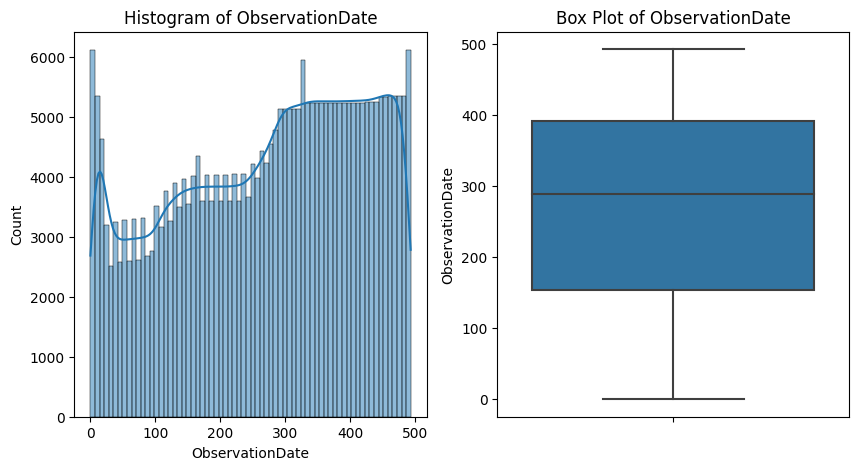

Signal-to-Noise Ratio (SNR): 4.610176167715001

----------------------------------------

Analyzing column: Province/State
Mean: 462.82863240750714
Median: 490.0
Standard Deviation: 244.5186612253159
Skewness: -0.35083545266489335


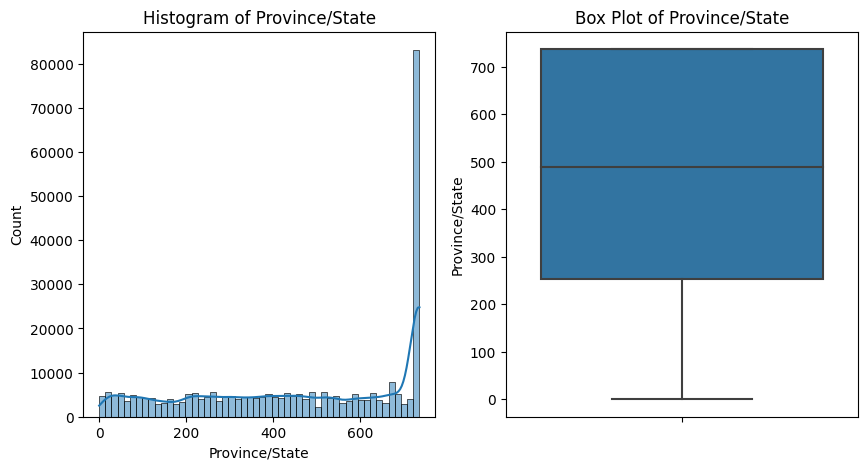

Signal-to-Noise Ratio (SNR): 4.5827609766680935

----------------------------------------

Analyzing column: Country/Region
Mean: 127.72857660338937
Median: 126.0
Standard Deviation: 64.2185374855337
Skewness: -0.20972126754405584


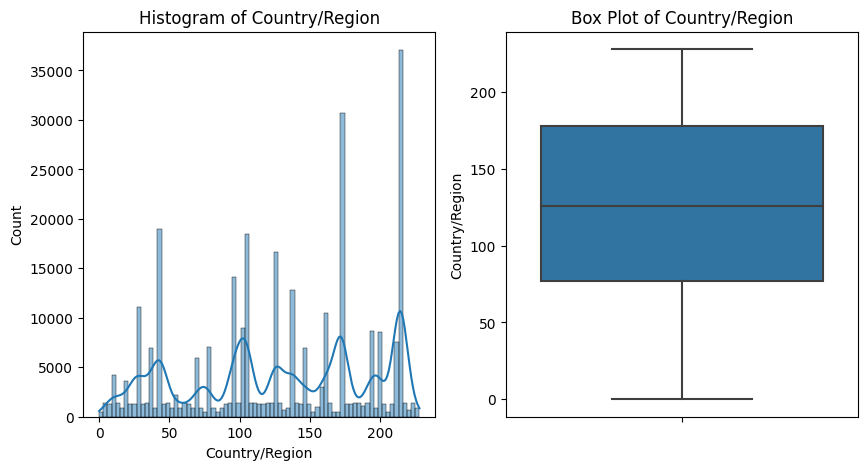

Signal-to-Noise Ratio (SNR): 4.956004170611087

----------------------------------------

Analyzing column: Last Update
Mean: 1822.897712031172
Median: 1842.0
Standard Deviation: 170.06422295532658
Skewness: -8.267352006833763


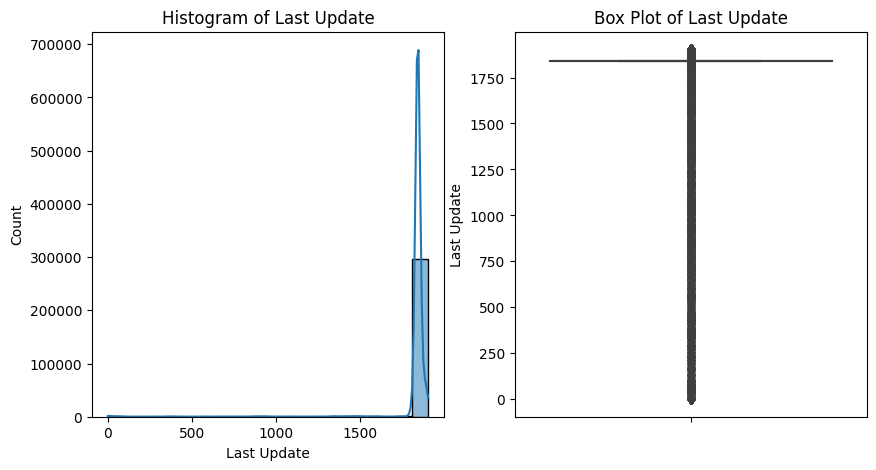

Signal-to-Noise Ratio (SNR): 115.89472733429342

----------------------------------------

Analyzing column: Confirmed
Mean: 85670.91155863185
Median: 10375.0
Standard Deviation: 277551.6040431502
Skewness: 8.768376652095425


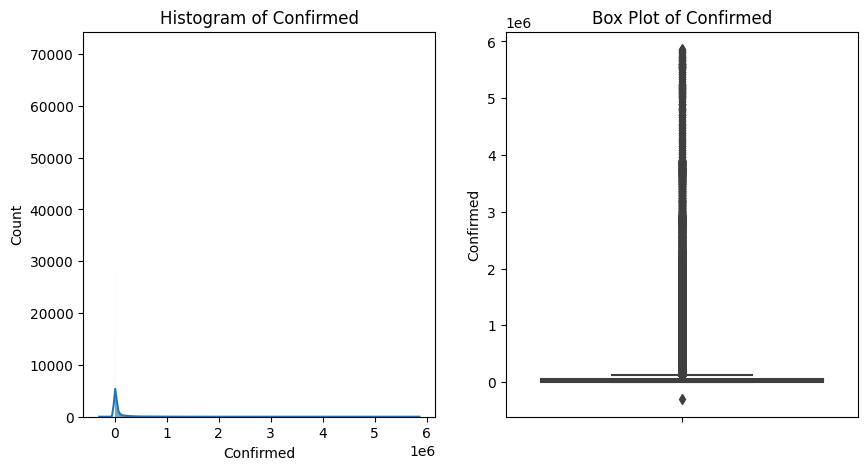

Signal-to-Noise Ratio (SNR): 1.0952753844671936

----------------------------------------

Analyzing column: Deaths
Mean: 2036.4032679674574
Median: 192.0
Standard Deviation: 6410.9380477066725
Skewness: 7.942416501708505


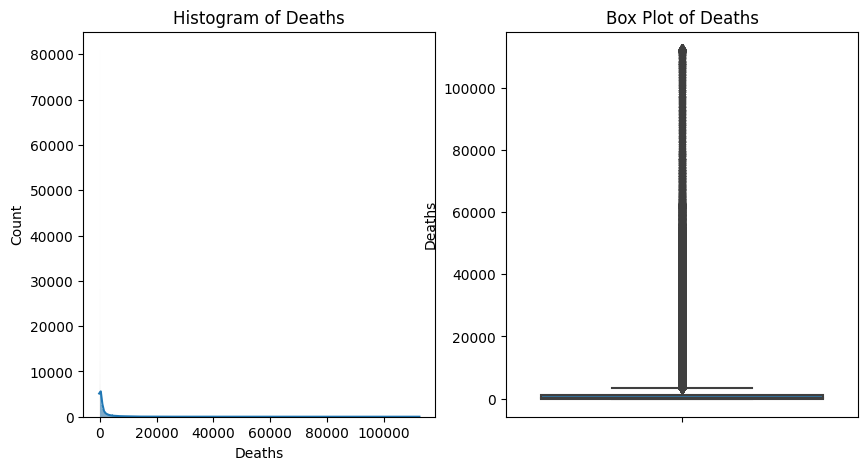

Signal-to-Noise Ratio (SNR): 1.1008987597071302

----------------------------------------

Analyzing column: Recovered
Mean: 50420.28630449468
Median: 1751.0
Standard Deviation: 201512.44783805608
Skewness: 10.694094429331887


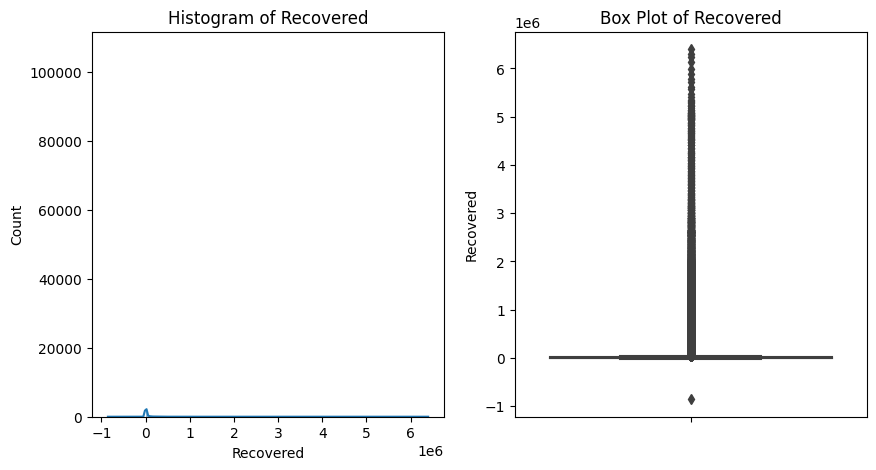

Signal-to-Noise Ratio (SNR): 1.0626048926222182

----------------------------------------



In [54]:
analyze_noise(data_copy)

<a id="ieda"></a>
## <p style="background-color:#23ff16; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 3.3 : Intelligently EDA</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="i1"></a>
## <p style="background-color:#23ff96; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 3.3.1 : Pandas Profiling</p>

⬆️ [Tabel of Contents](#contents_tabel)

<h2 style=color:green align="left"> 1) For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report </h2>

 - **Type inference:** detect the types of columns in a dataframe.

 - **Essentials:** type, unique values, missing values

 - **Quantile statistics** like minimum value, Q1, median, Q3, maximum, range, interquartile range

 - **Descriptive statistics** like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness

 - **Most frequent values**

 - **Histogram**

 - **Correlations** highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices

 - **Missing values** matrix, count, heatmap and dendrogram of missing values

 - **Text analysis** learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.

 - **File and Image analysis** extract file sizes, creation dates and dimensions and scan for truncated images or those containing EXIF information.

<h2 style=color:green align="left"> 2) Understanding the Report </h2>

 - The report generated contains a general overview and different sections for different characteristics of attributes of the dataset. The different sections are:
 
#### A) Overview

 - Statistics on the overall dataset and the number of variables (columns) and observations (rows).

#### B) Variable Properties

 - We can scroll down to see all the variables in the dataset and their properties.
 
 - This is just a data science-type name for the columns, dimensions or fields in your dataset (table). Summary statistics and distribution plots are provided for each column in the dataset.
 
#### C) Interaction of Variables

 - Similarly, we can also view the interaction of different attributes of the dataset with each other.
 
 - A quick interactive way to explore the columns and plot them against each other as scatterplots.
 
#### D) Correlations of the variable

 - The report generated contains different types of correlations like Spearman’s, Kendall’s, etc. of all the attributes of the dataset.
 
 - A set of different correlation matrices so you can quickly see how the columns in your data correlate or impact each other. TIP: To see a brief explanation of each correlation, click "Toggle correlation descriptions".
 
#### E) Missing Values

 - Other than this the report also shows which attributes have missing values.
 
 - The report generated is really helpful in identifying patterns in the data and finding out the characteristics of the data. 
 
 - A few different visual summaries about missing values in the dataset for each column.
 
#### F) Samples

 - Data previews of the first and last 10 rows in the dataset.

<h2 style=color:green align="left"> 3) Displaying and Saving the Report </h2>

 - Once you have the data profile object, there's a few different methods you can choose from to display and save the report.

#### Display in the notebook:

      to_widgets()
      to_notebook_iframe()

#### Assign to a string:

      to_html()
      to_json()

#### Save as a file:

     to_file("report_name.html")
     to_file("report_name.json")

In [55]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

FM 2: Write some Analysis on these plots 

<a id="i2"></a>
## <p style="background-color:#23ff96; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 3.3.2 : PandasAI</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [58]:
# Instantiate a LLM
llm = OpenAI(
    base_url="https://api.avalai.ir/v1",
    api_token="aa-rzDrWuppbQrkuqnQiUR2PuLKI96HFxT1jrpWQPrAu2isMlyW",
    temperature=0,
    seed=26
)

In [59]:
data = SmartDataframe(data, config={"llm": llm})
data.chat('Which are the 5 seekest countries?')

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
  File "/opt/conda/lib/python3.10/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/opt/conda/lib/python3.10/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/opt/conda/lib/python3.10/site-packages/pandasai/pipelines/chat/code_generator.py", line 33, in execute
    code = pipeline_context.config.llm.generate_code(input, pipeline_context)
  File "/opt/conda/lib/python3.10/site-packages/pandasai/llm/base.py", line 201, in generate_code
    response = self.call(instruction, context)
  File "/opt/conda/lib/python3.10/site-packages/pandasai/llm/base.py", line 391, in call
    self.chat_completion(self.last_prompt, memory)
  File "/opt/conda/lib/python3.10/site-packages/pandasai/llm/base.py", line 365, in chat_completion
    response = 

"Unfortunately, I was not able to answer your question, because of the following error:\n\nError code: 401 - {'error': {'message': 'Incorrect API key provided: aa-rzDrW***************************************MlyW. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}\n"

In [ ]:
%html
<iframe src="https://www.linkedin.com/embed/feed/update/urn:li:ugcPost:7060641449888882688" height="901" width="504" frameborder="0" allowfullscreen="" title="Embedded post"></iframe>